# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-2.10.0-cp39-cp39-win_amd64.whl (455.9 MB)
     ------------------------------------ 455.9/455.9 MB 148.4 kB/s eta 0:00:00
     -------------------------------------- 35.6/35.6 MB 181.5 kB/s eta 0:00:00
     ---------------------------------------- 7.2/7.2 MB 40.1 kB/s eta 0:00:00
     ------------------------------------- 162.7/162.7 KB 60.6 kB/s eta 0:00:00
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached wrapt-1.14.1-cp39-cp39-win_amd64.whl (35 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorboard-2.10.0-py3-none-any.whl (5.9 MB)
  Using cached grpcio-1.48.1-cp39-cp39-win_amd64.whl (3.6 MB)
  Using cached numpy-1.23.3-cp39-cp39-win_amd64.whl (14.7 MB)
  Using cached termcolor-2.0.1-py3-none-any.whl (5.4 kB)
  Using cached flatbuffers-2.0.7-py2.py3-none-any.whl (26 kB)
  Using cached tensorflow_io_gcs_filesystem-0.27.0-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached tensorflow_estimator-2.10.0-py2.p

You should consider upgrading via the 'C:\Users\PC\imageclassification\Scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      1.2.0
asttokens                    2.0.8
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.2.0
certifi                      2022.6.15.2
charset-normalizer           2.1.1
colorama                     0.4.5
cycler                       0.11.0
debugpy                      1.6.3
decorator                    5.1.1
entrypoints                  0.4
executing                    1.0.0
flatbuffers                  2.0.7
fonttools                    4.37.1
gast                         0.4.0
google-auth                  2.11.0
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.48.1
h5py                         3.7.0
idna                         3.4
importlib-metadata           4.12.0
ipykernel                    6.15.3
ipython                      8.5.0
jedi                         0.18.1
jup

You should consider upgrading via the 'C:\Users\PC\imageclassification\Scripts\python.exe -m pip install --upgrade pip' command.


In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [2]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [3]:
import cv2
import imghdr

In [4]:
data_dir = 'data' 

In [5]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [6]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [7]:
import numpy as np
from matplotlib import pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [8]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [9]:
data_iterator = data.as_numpy_iterator()

In [10]:
batch = data_iterator.next()

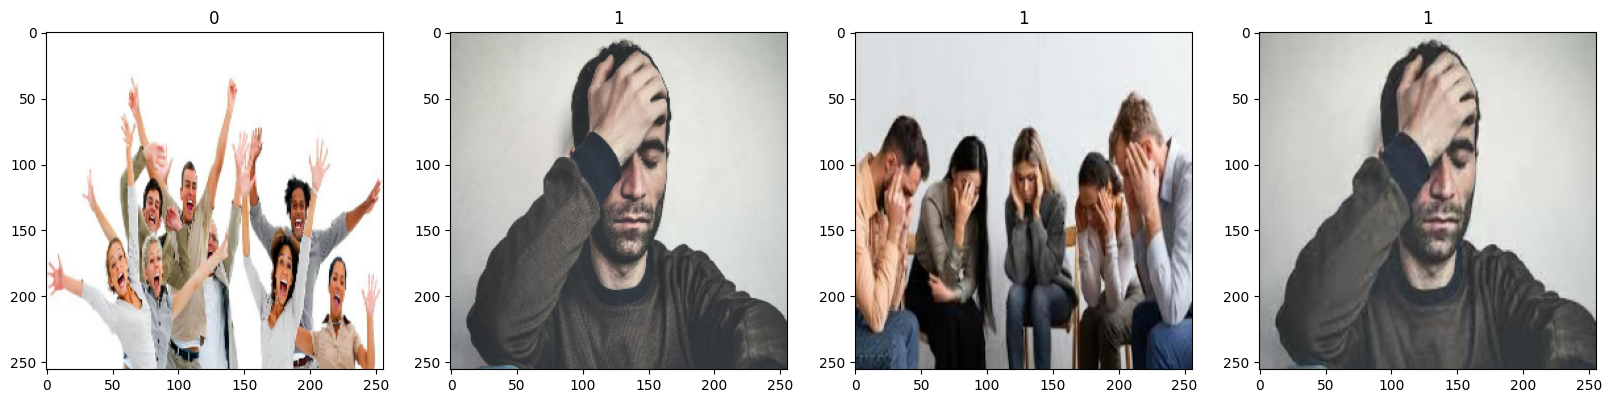

In [11]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [12]:
data = data.map(lambda x,y: (x/255, y))

In [13]:
data.as_numpy_iterator().next()

(array([[[[0.5529412 , 0.6313726 , 0.59607846],
          [0.5505821 , 0.6290135 , 0.59270835],
          [0.53985906, 0.6182904 , 0.5773897 ],
          ...,
          [0.9026961 , 0.94191176, 0.9772059 ],
          [0.91495097, 0.95416665, 0.98946077],
          [0.91764706, 0.95686275, 0.99215686]],
 
         [[0.5532782 , 0.6317096 , 0.59574145],
          [0.55089015, 0.6293505 , 0.5923424 ],
          [0.5400355 , 0.6186274 , 0.5768921 ],
          ...,
          [0.9056976 , 0.94491327, 0.9791648 ],
          [0.9174259 , 0.95664155, 0.9903665 ],
          [0.92000616, 0.95922184, 0.9928309 ]],
 
         [[0.55481005, 0.6332414 , 0.59420955],
          [0.5522904 , 0.6308824 , 0.5906789 ],
          [0.5408373 , 0.6201593 , 0.5746302 ],
          ...,
          [0.9193407 , 0.9585564 , 0.9880687 ],
          [0.92867553, 0.9678912 , 0.99448335],
          [0.93072915, 0.96994483, 0.9958946 ]],
 
         ...,
 
         [[0.01773897, 0.01773897, 0.02558211],
          [0.01655

# 5. Split Data

In [14]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [15]:
train_size

7

In [16]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [18]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [18]:
model = Sequential()

In [19]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [22]:
logdir='logs'

In [23]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [24]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 12s 1s/step - loss: 0.8520 - accuracy: 0.5312 - val_loss: 0.6672 - val_accuracy: 0.5312
Epoch 2/20
7/7 [==============================] - 9s 1s/step - loss: 0.6857 - accuracy: 0.5089 - val_loss: 0.6819 - val_accuracy: 0.5156
Epoch 3/20
7/7 [==============================] - 9s 1s/step - loss: 0.6373 - accuracy: 0.7411 - val_loss: 0.5480 - val_accuracy: 0.7656
Epoch 4/20
7/7 [==============================] - 9s 1s/step - loss: 0.5047 - accuracy: 0.7321 - val_loss: 0.5089 - val_accuracy: 0.8281
Epoch 5/20
7/7 [==============================] - 9s 1s/step - loss: 0.4024 - accuracy: 0.8795 - val_loss: 0.2819 - val_accuracy: 0.8906
Epoch 6/20
7/7 [==============================] - 9s 1s/step - loss: 0.3399 - accuracy: 0.8571 - val_loss: 0.2930 - val_accuracy: 0.8281
Epoch 7/20
7/7 [==============================] - 9s 1s/step - loss: 0.3485 - accuracy: 0.8750 - val_loss: 0.3551 - val_accuracy: 0.8125
Epoch 8/20
7/7 [========================

# 8. Plot Performance

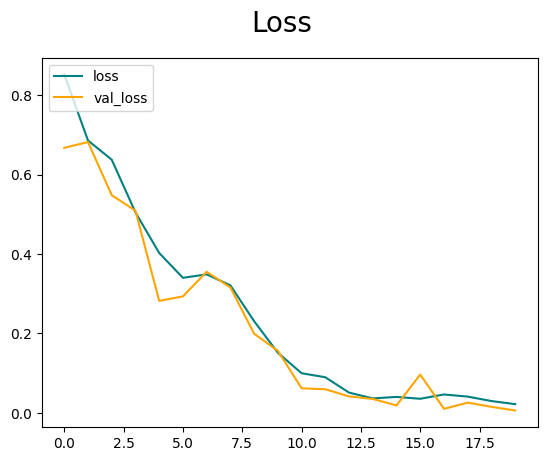

In [25]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

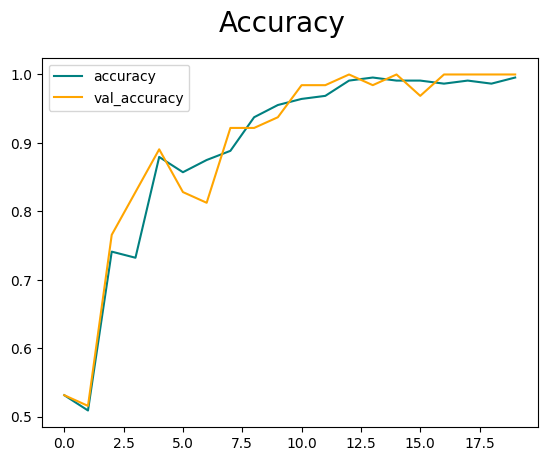

In [26]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [27]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [28]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [29]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 279ms/step


In [30]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [31]:
import cv2

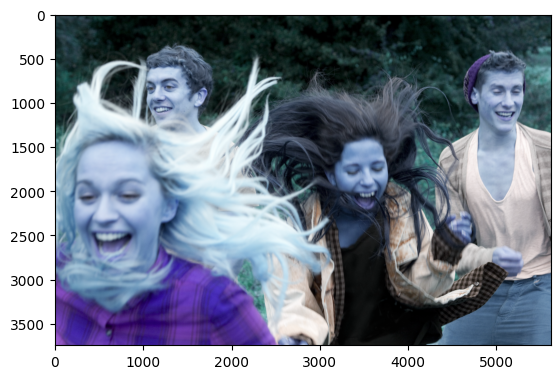

In [32]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

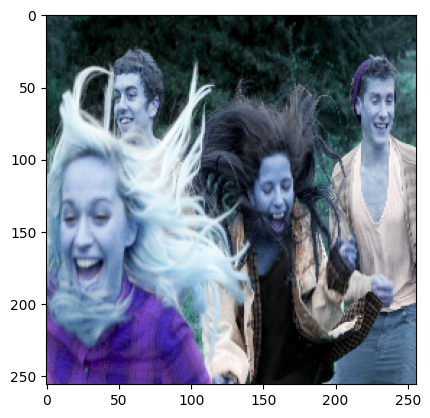

In [33]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [34]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 51ms/step


In [35]:
yhat

array([[0.06830928]], dtype=float32)

In [36]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [37]:
from tensorflow.keras.models import load_model

In [42]:
model.save(os.path.join('models','imageclassifiernewversionlive.h5'))

In [44]:
new_model = load_model(os.path.join('models','imageclassifiernewversionlive.h5'))

In [45]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 84ms/step


array([[0.06830928]], dtype=float32)